#### House-Prices---Advanced-Regression-Techniques

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Loading the Dataset**

In [2]:
data = pd.read_csv(r'data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#investigating the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset has no missing values, however some columns such as 'alley' have nan values

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#investigating the columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Data Cleaning**

In [6]:
# List of columns to drop
columns_to_drop = [
    'Id', 'Street', 'Alley', 'Utilities', 'Condition2', 'RoofMatl', 
    'PoolQC', 'MiscFeature', 'Fence', 'MoSold', 'YrSold'
]

# Drop columns
data = data.drop(columns=columns_to_drop, axis=1)

# Check the remaining columns
print("Remaining columns:", data.columns)


Remaining columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [7]:
# Find columns with NaN values and their count
nan_columns = data.isna().sum()
nan_columns = nan_columns[nan_columns > 0]

# Display columns with NaN values and their count
print("Columns with NaN values:\n", nan_columns)


Columns with NaN values:
 LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [8]:
# Calculate percentage of NaN values in each column
nan_percentage = data.isna().mean() * 100

# Filter columns with NaN values and display the percentage
nan_percentage = nan_percentage[nan_percentage > 0]
print("Percentage of NaN values in columns:\n", nan_percentage)


Percentage of NaN values in columns:
 LotFrontage     17.739726
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In [9]:
# Filling with the median for numerical columns with few missing values
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)

# Fill with mode for categorical columns with few missing values
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)

# Fill with 'None' for categorical columns where NaN likely means absence of the feature
data['MasVnrType'].fillna('None', inplace=True)
data['BsmtQual'].fillna('None', inplace=True)
data['BsmtCond'].fillna('None', inplace=True)
data['BsmtExposure'].fillna('None', inplace=True)
data['BsmtFinType1'].fillna('None', inplace=True)
data['BsmtFinType2'].fillna('None', inplace=True)
data['FireplaceQu'].fillna('None', inplace=True)
data['GarageType'].fillna('None', inplace=True)
data['GarageFinish'].fillna('None', inplace=True)
data['GarageQual'].fillna('None', inplace=True)
data['GarageCond'].fillna('None', inplace=True)

# Verify that there are no remaining NaN values
print("Remaining NaN values:\n", data.isna().sum()[data.isna().sum() > 0])


Remaining NaN values:
 Series([], dtype: int64)


In [10]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,298,0,0,0,0,0,0,WD,Normal,181500
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,42,0,0,0,0,0,WD,Normal,223500
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,35,272,0,0,0,0,WD,Abnorml,140000
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,192,84,0,0,0,0,0,WD,Normal,250000


**EXPLORATORY DATA ANALYSIS**

In [11]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'S

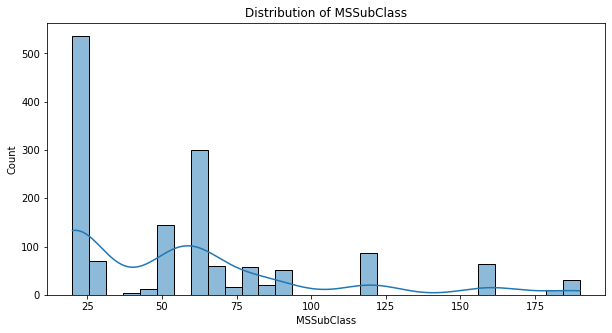

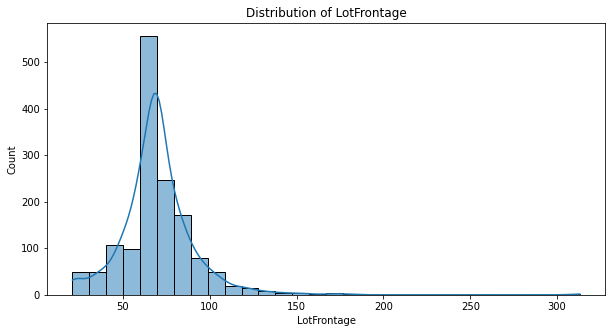

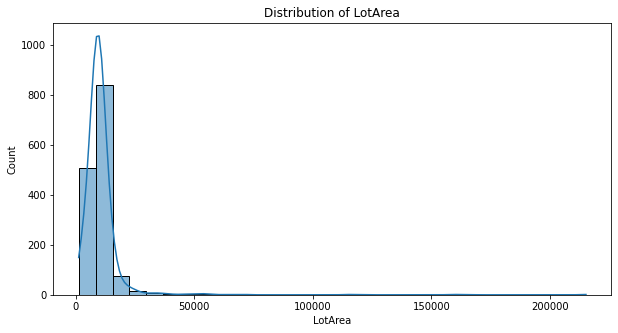

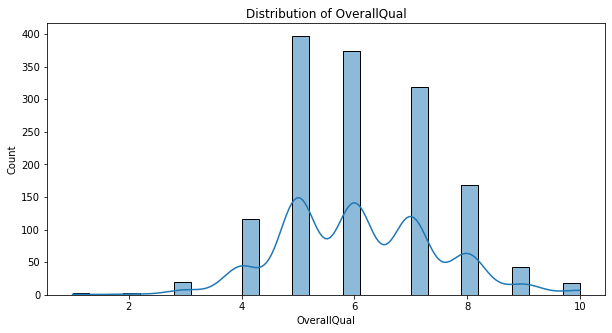

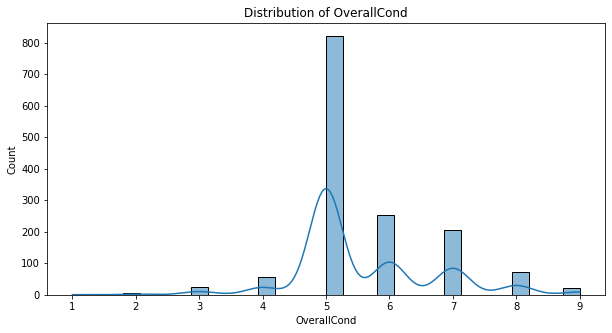

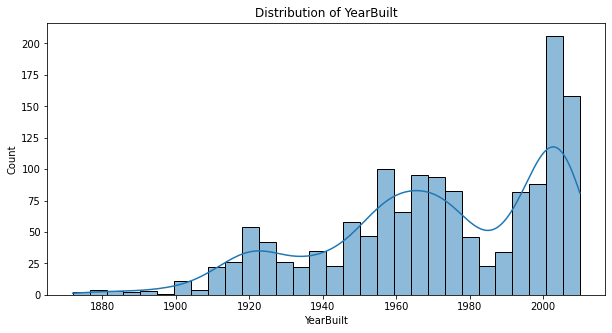

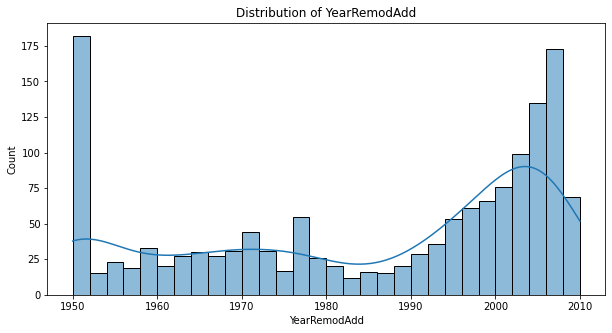

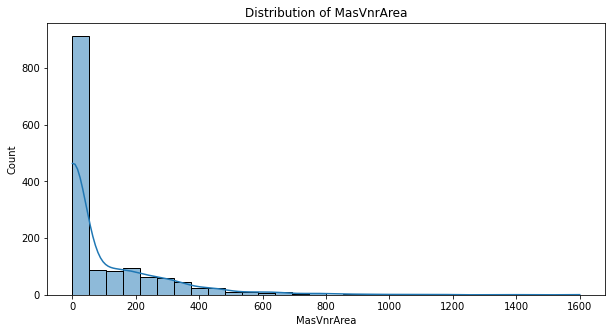

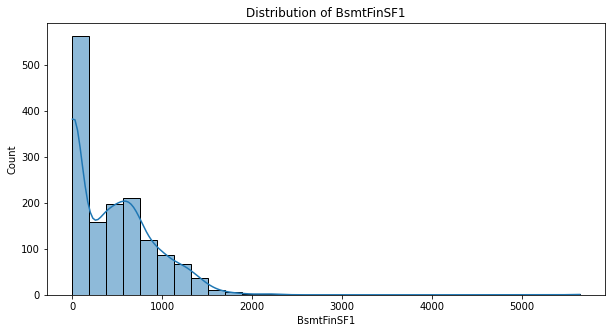

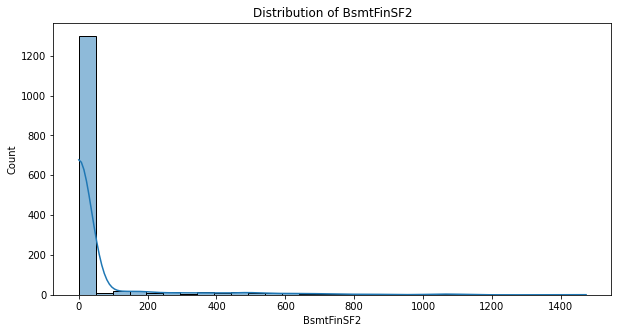

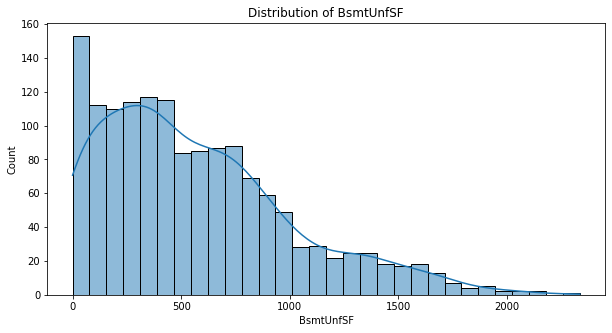

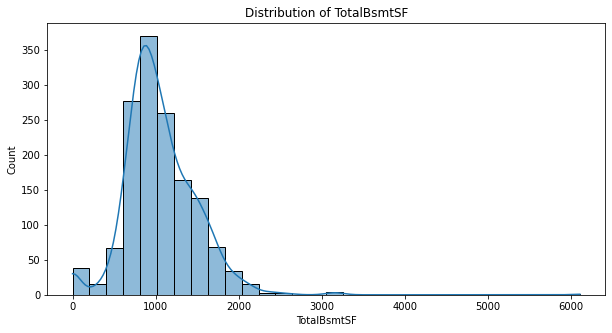

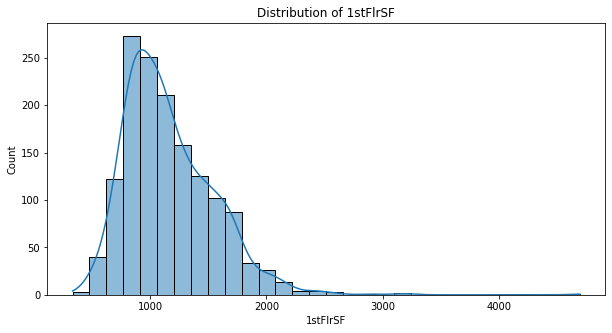

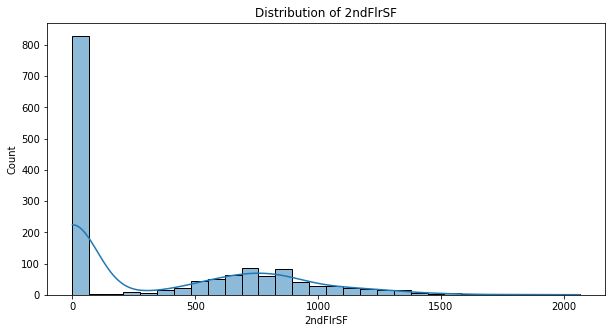

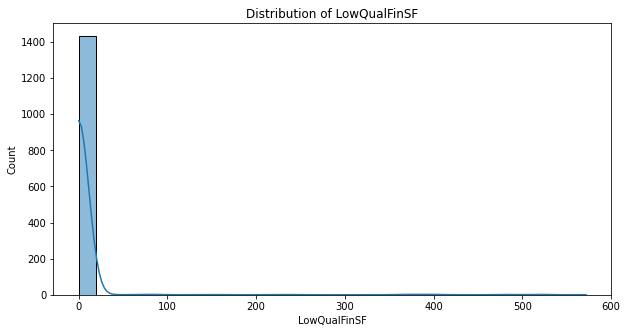

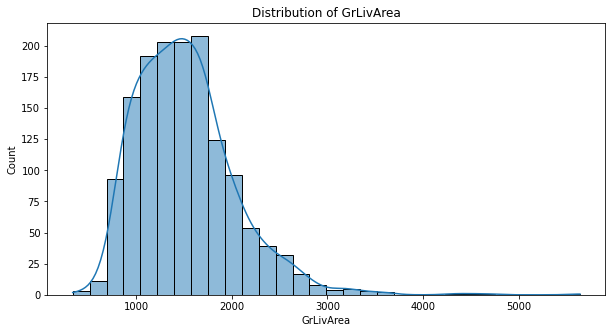

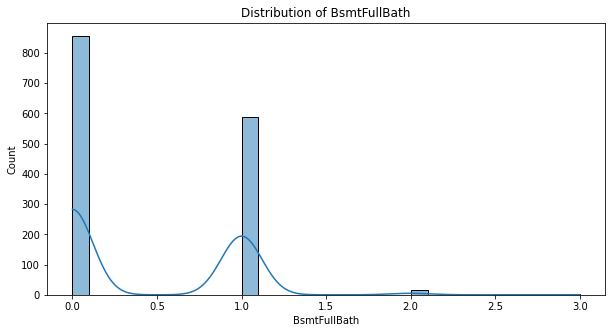

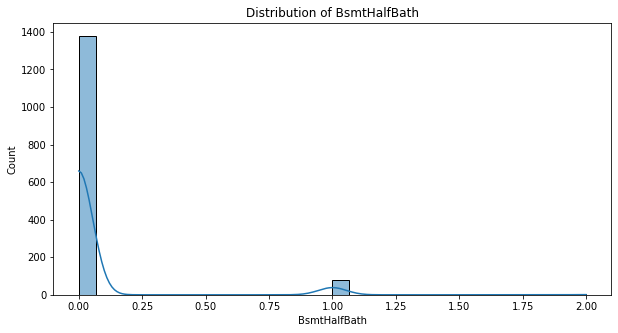

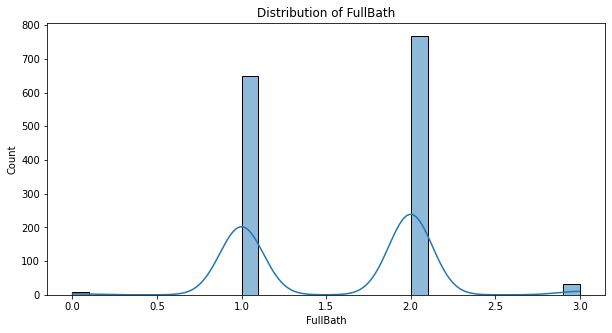

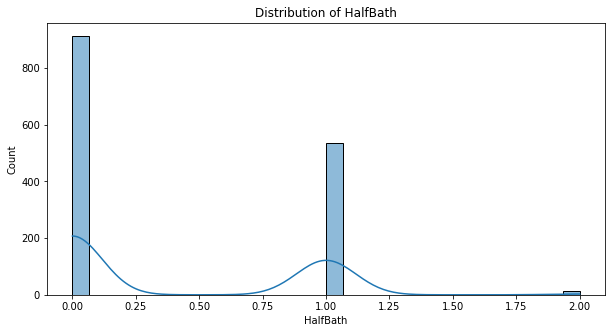

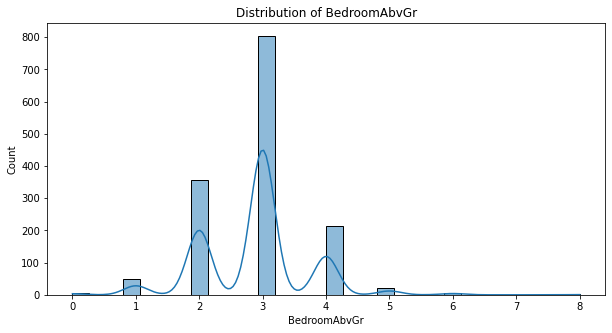

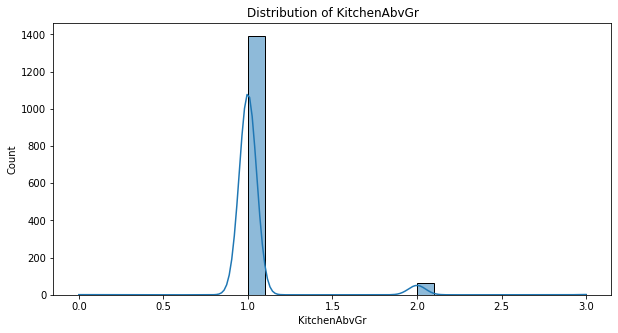

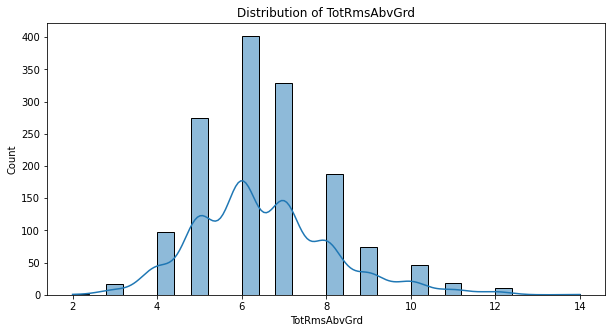

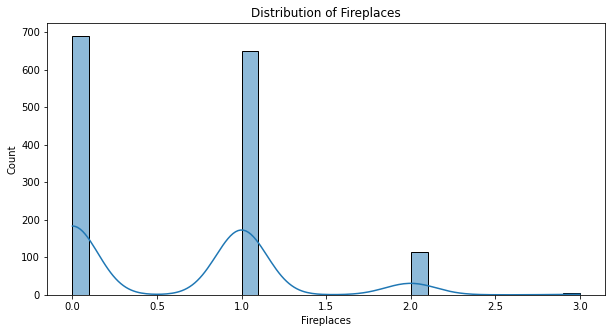

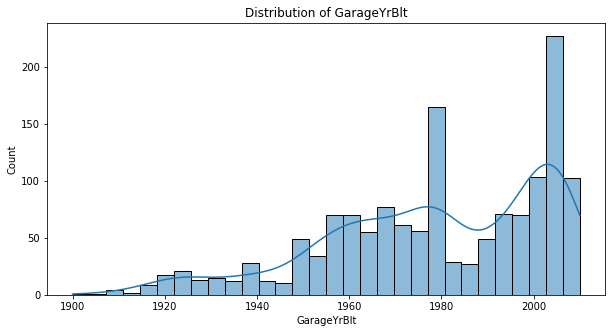

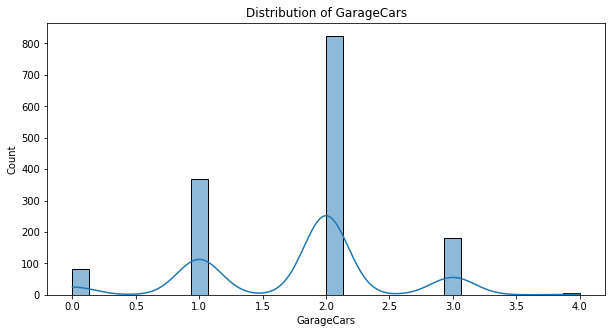

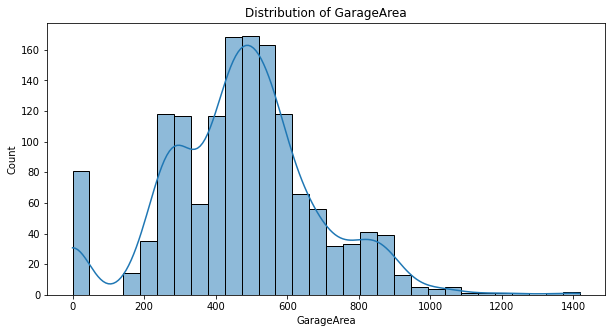

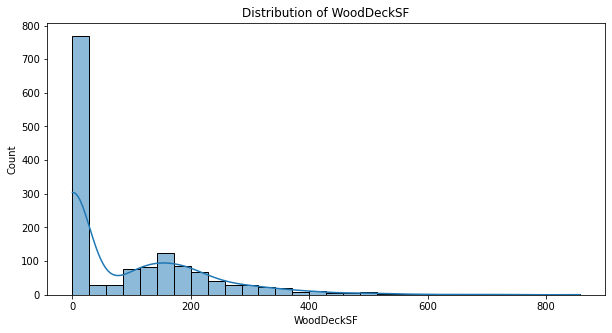

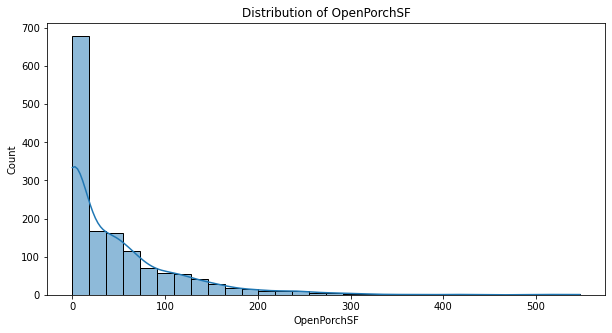

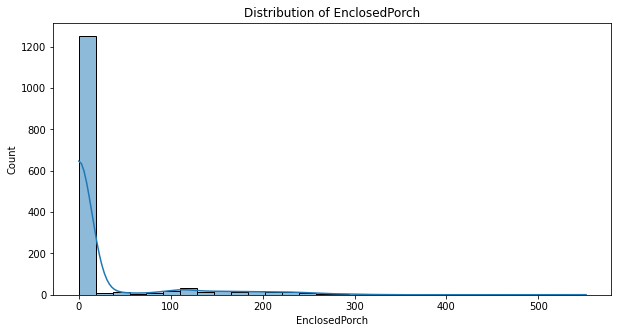

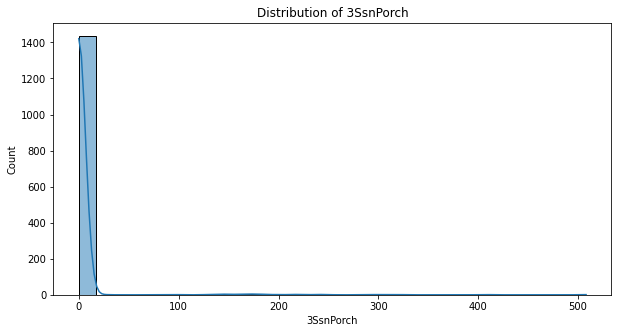

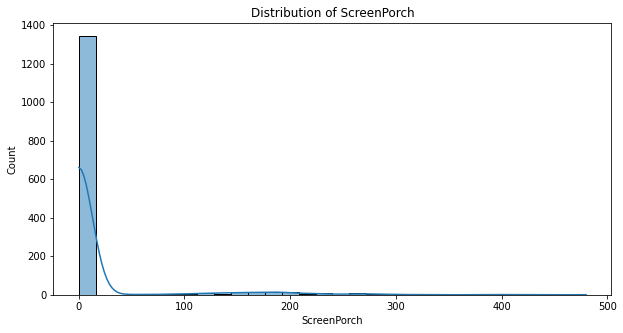

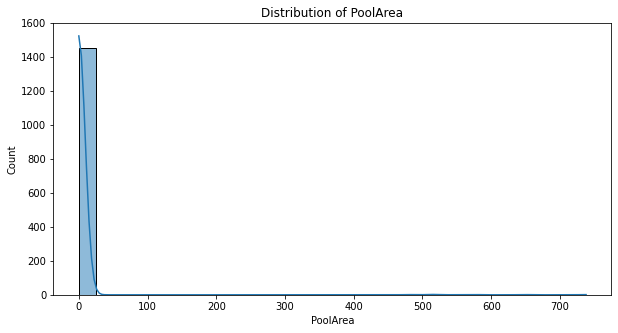

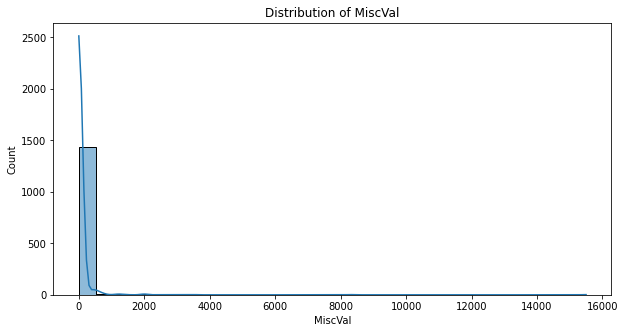

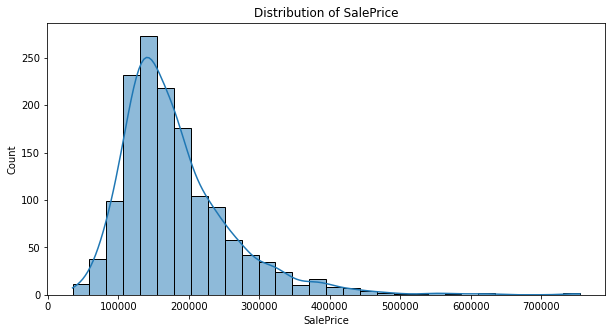

In [12]:
# Numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig(f"Visualisations/{col}_distribution.png", format="png", dpi=300)
    plt.show()
   

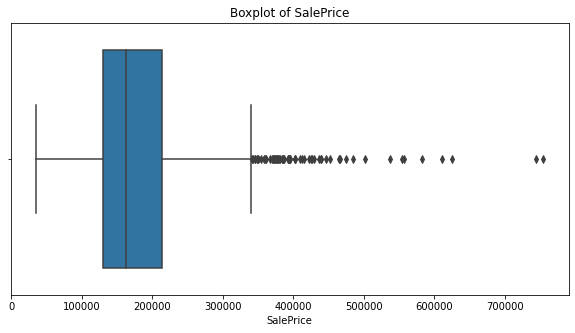

In [13]:
 
plt.figure(figsize=(10, 5))
sns.boxplot(x=data[col])
plt.title(f'Boxplot of {col}')
plt.savefig(f"Visualisations/{col}_boxplot.png", format="png", dpi=300)
plt.show()

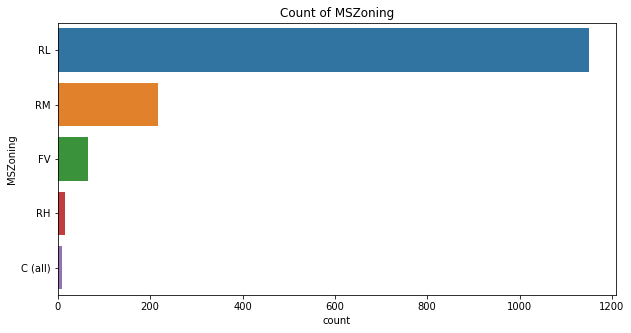

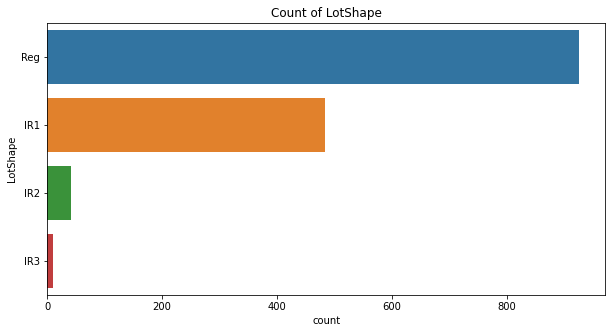

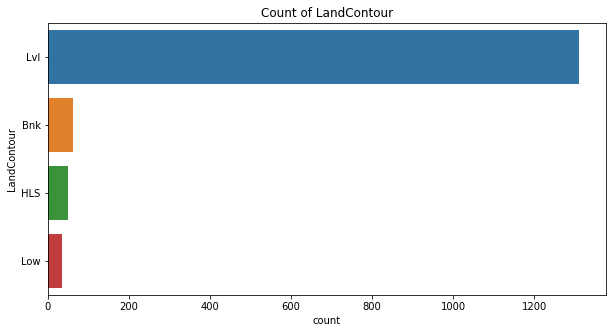

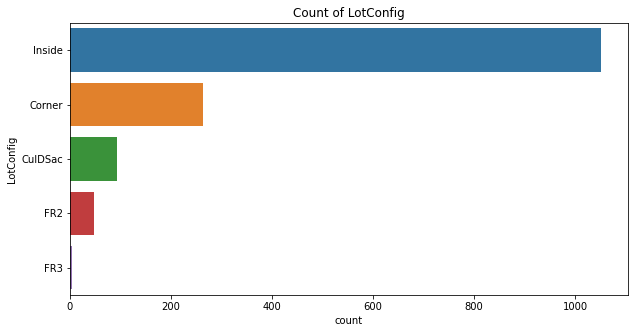

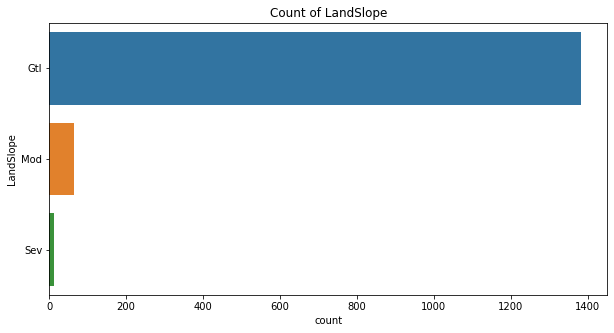

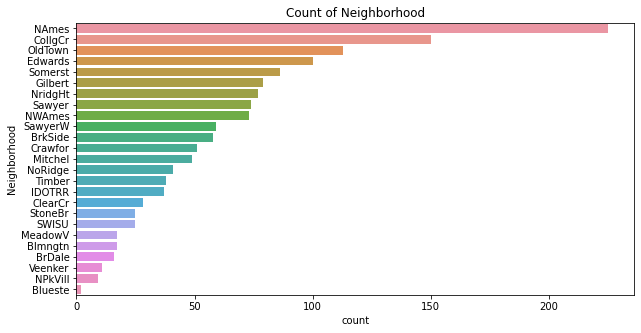

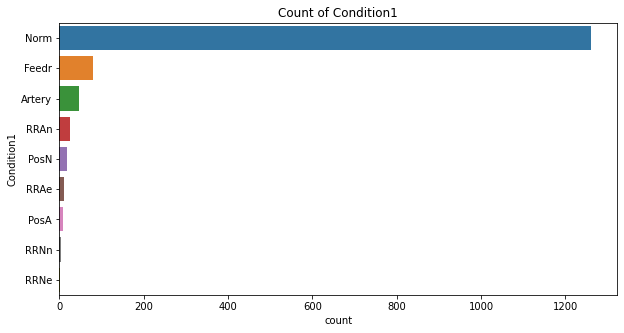

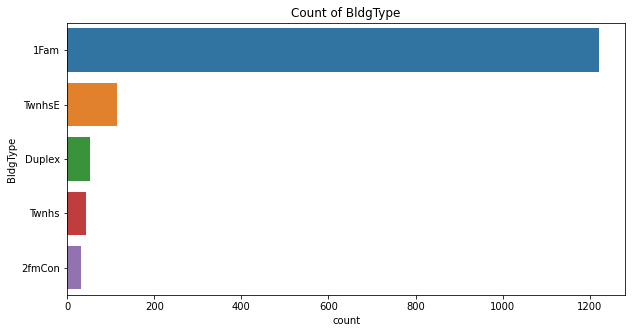

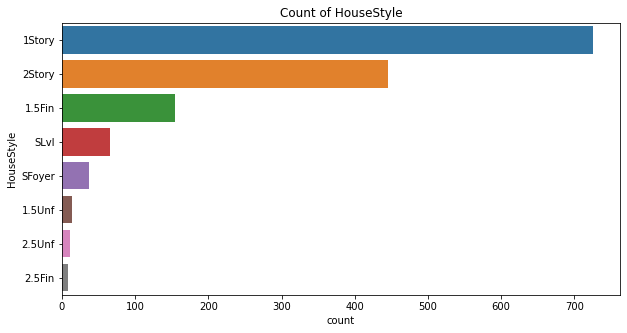

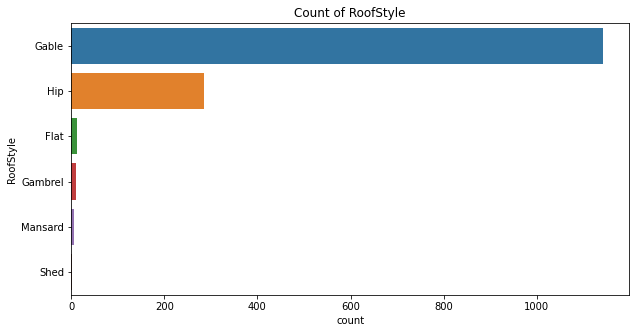

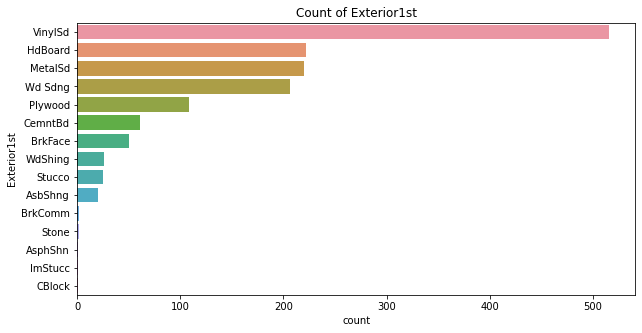

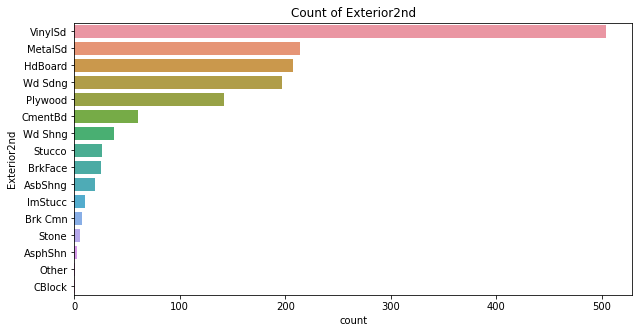

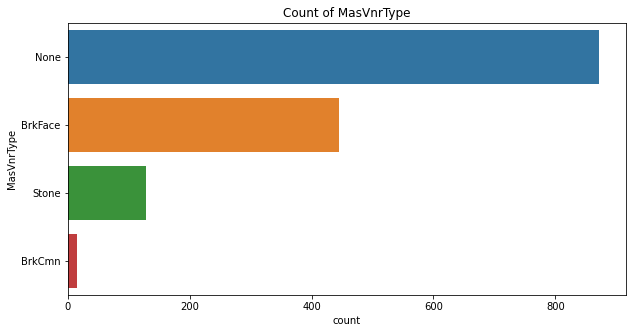

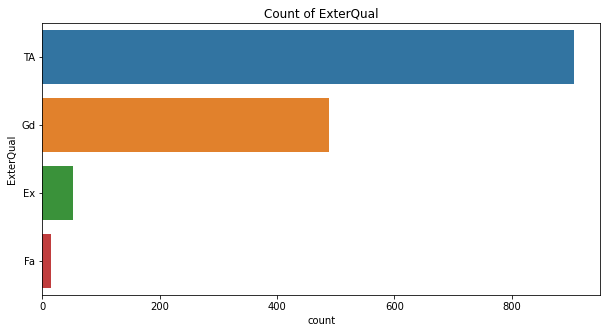

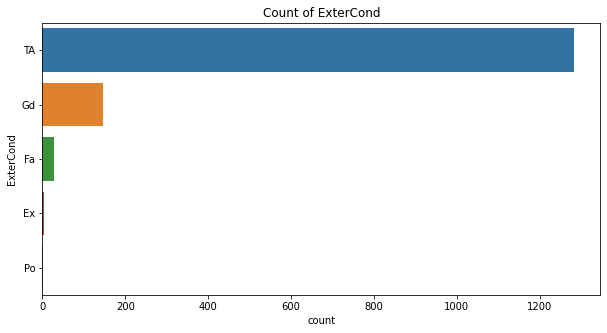

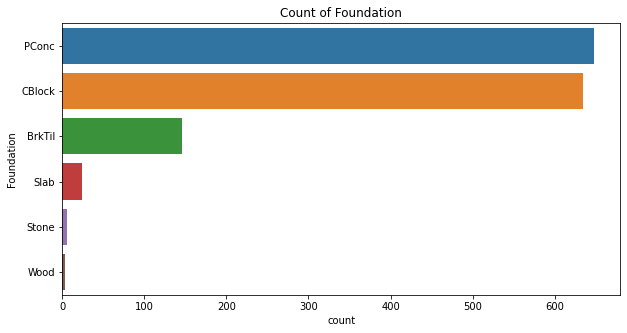

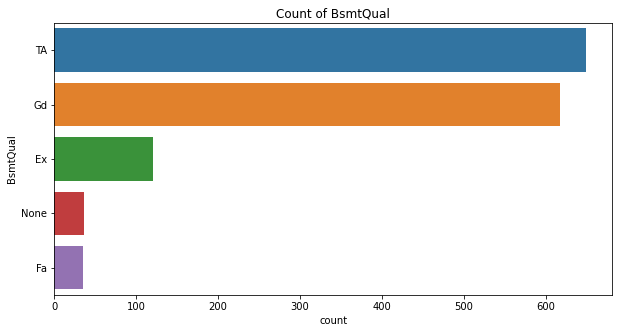

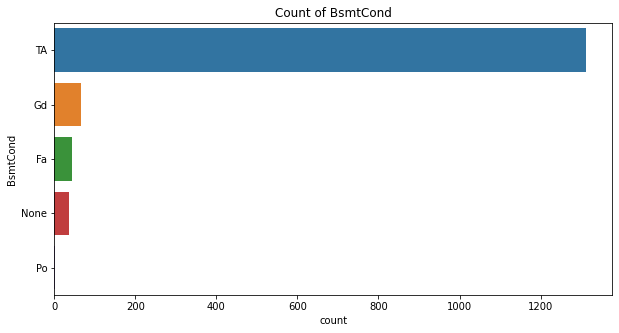

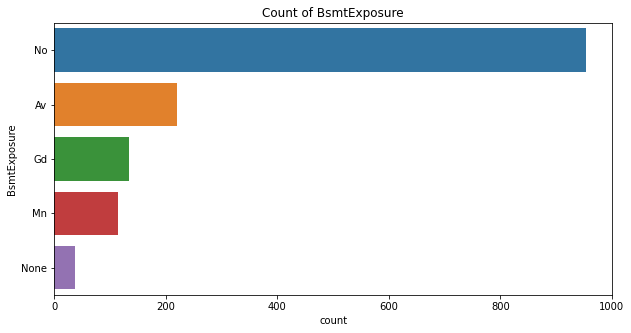

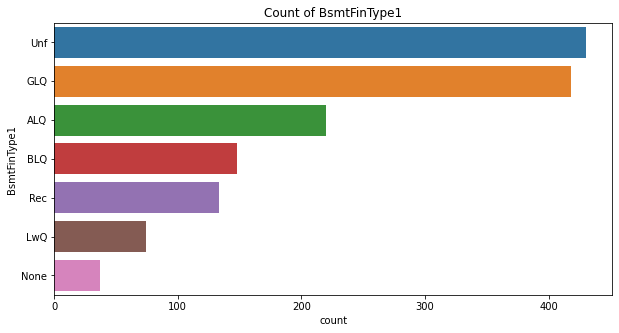

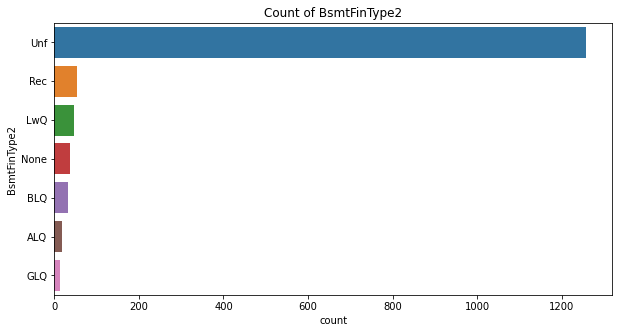

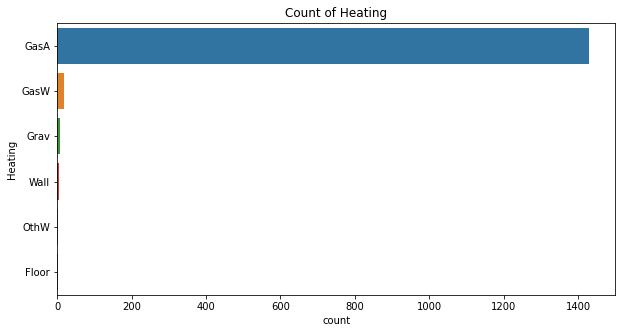

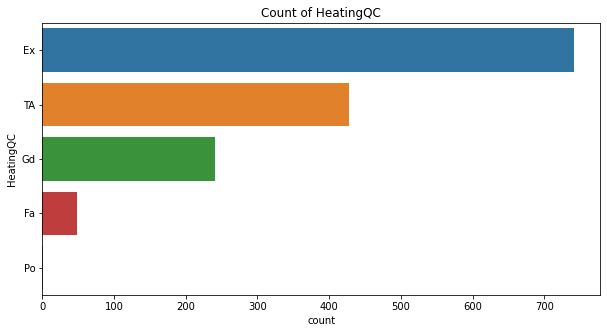

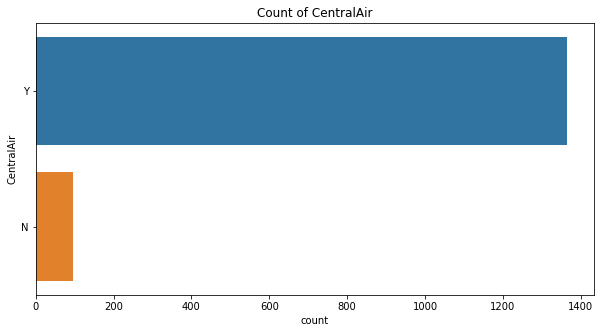

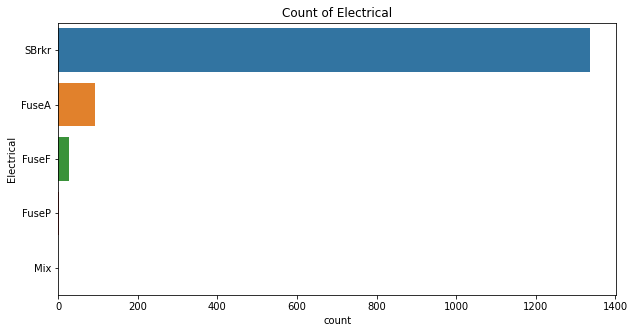

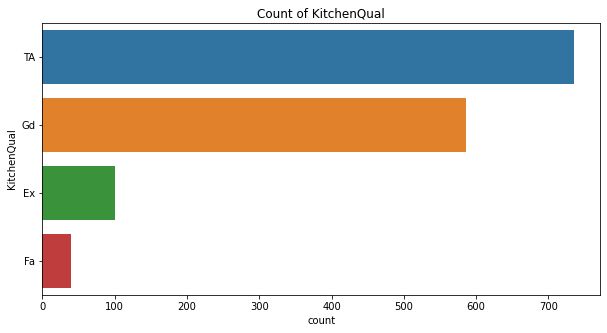

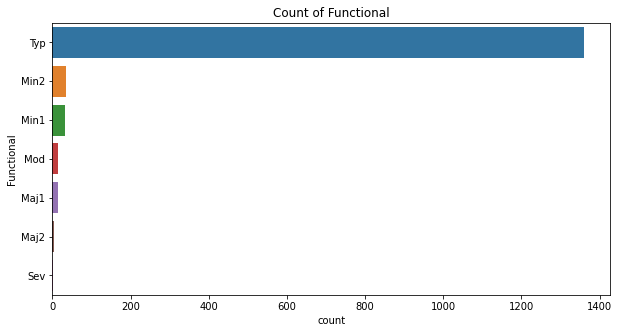

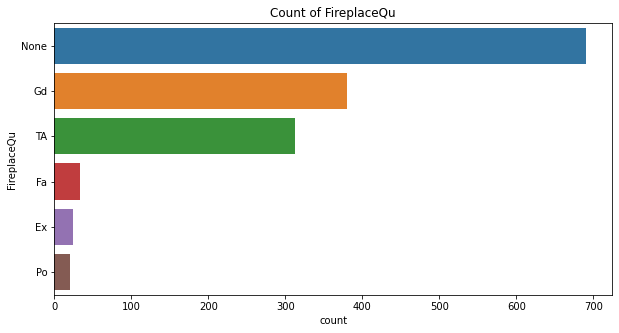

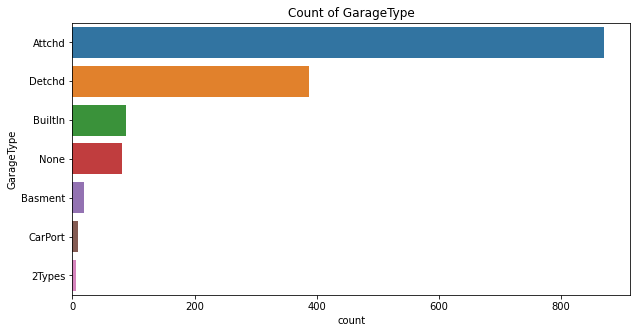

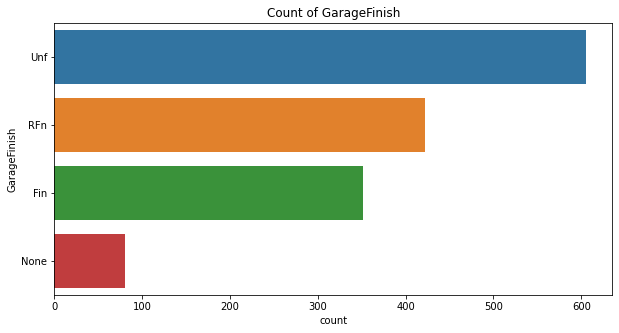

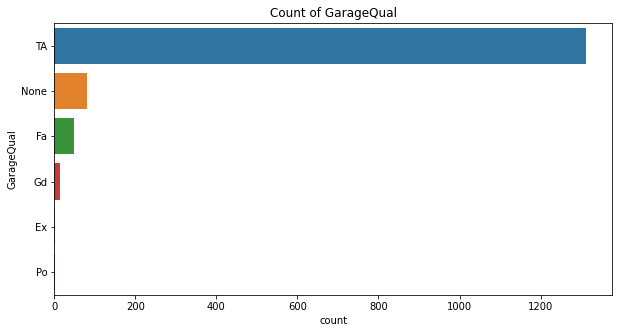

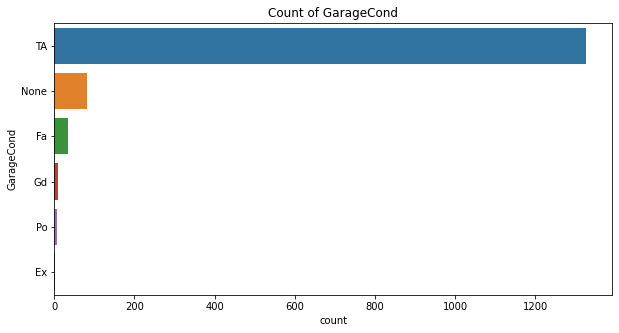

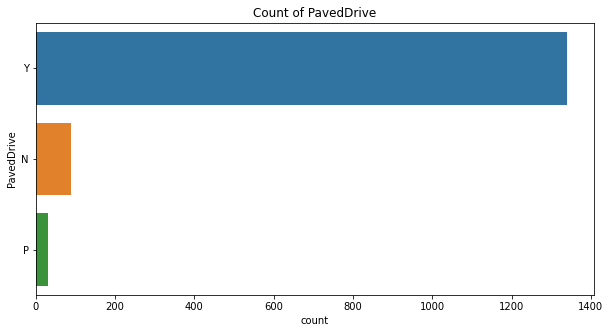

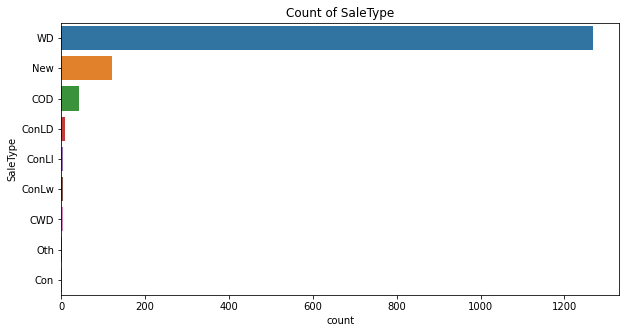

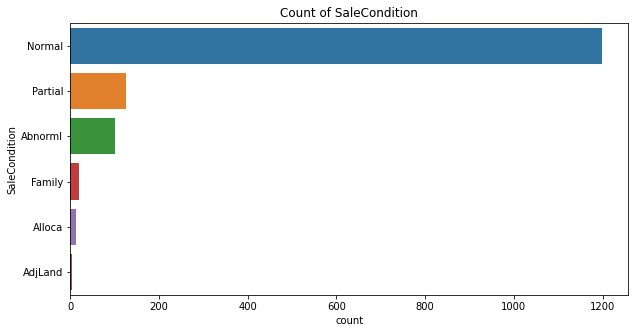

In [14]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.savefig(f"Visualisations/{col}_distribution.png", format="png", dpi=300)
    plt.show()

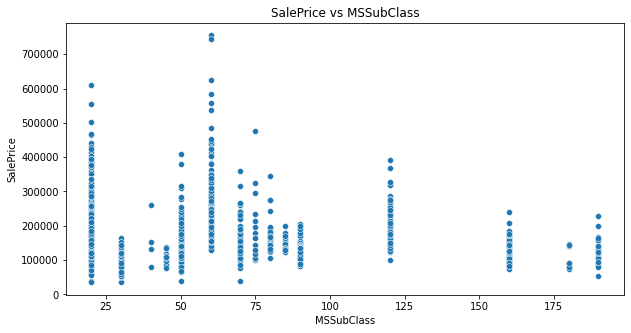

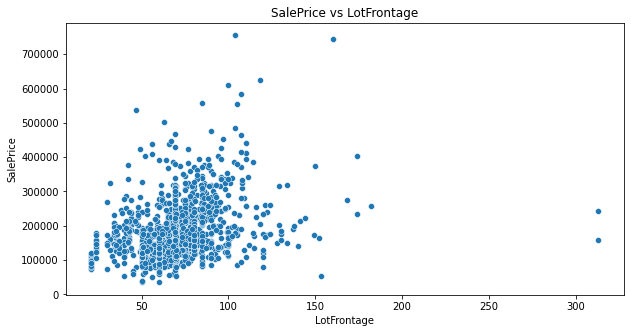

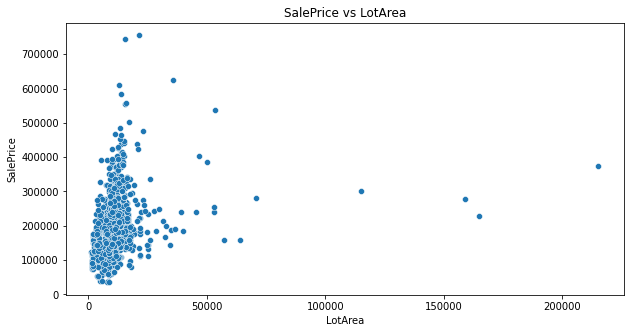

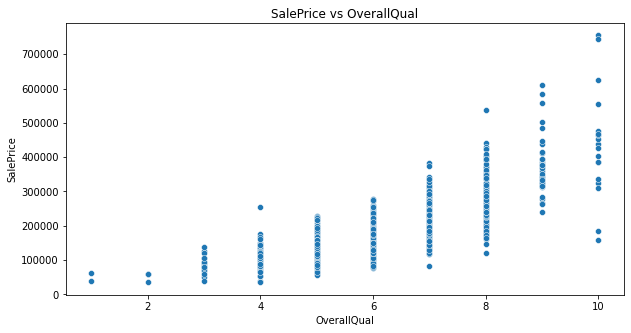

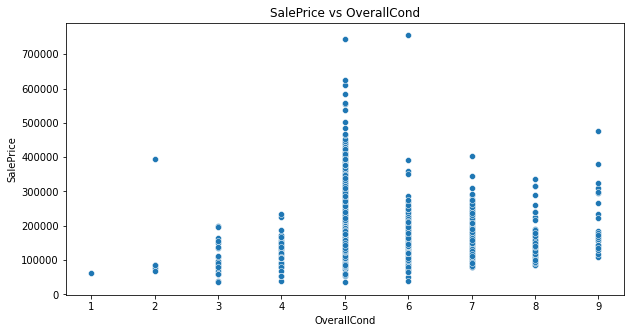

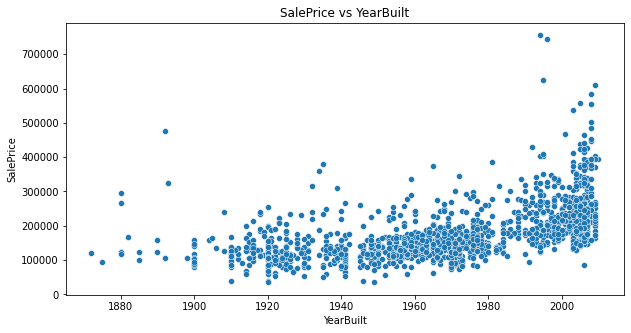

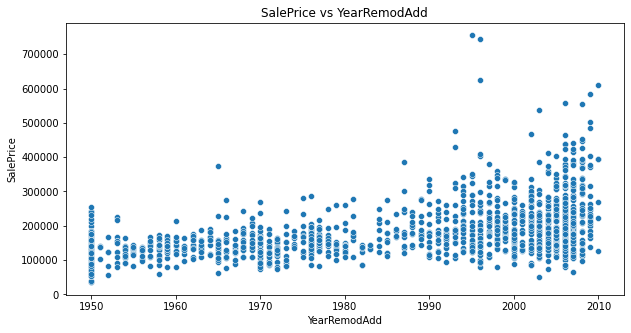

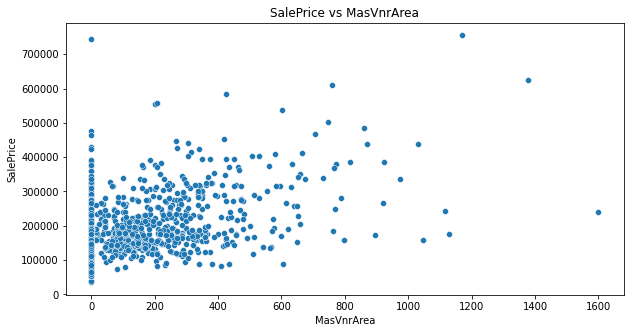

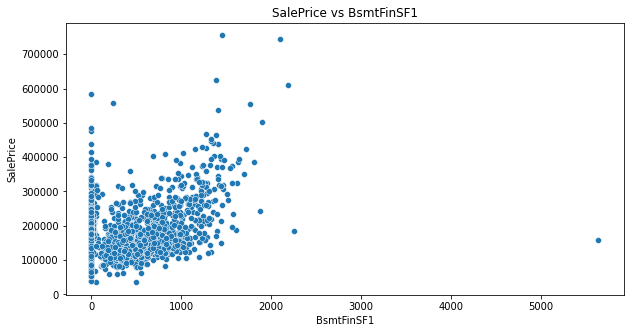

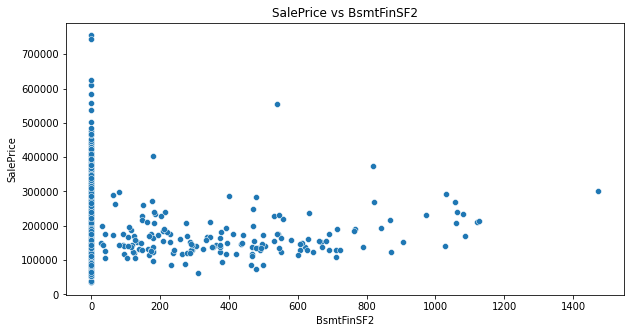

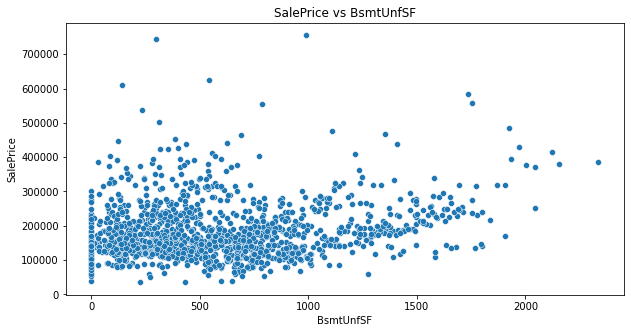

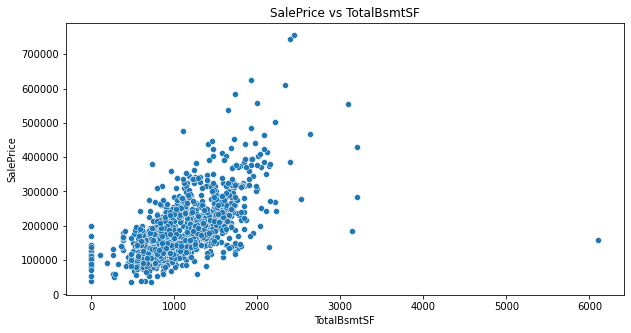

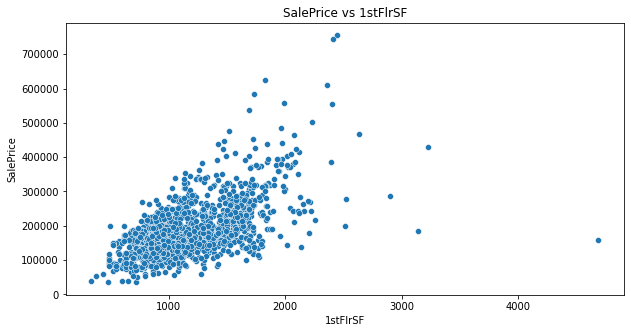

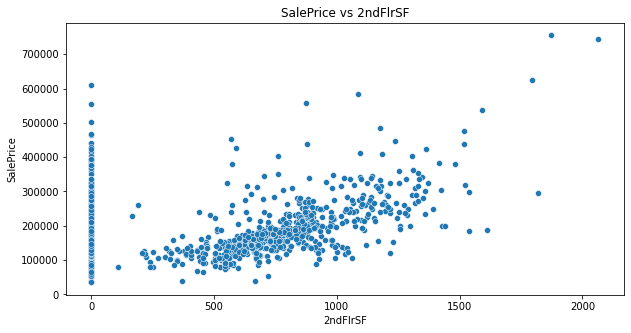

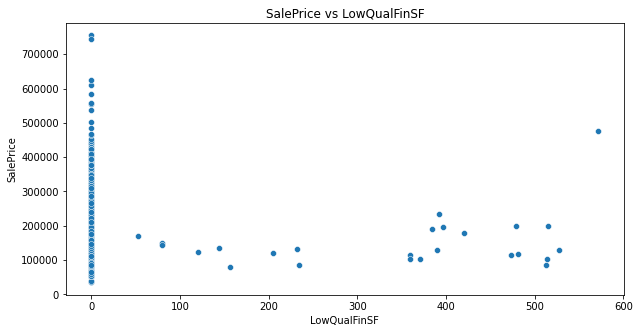

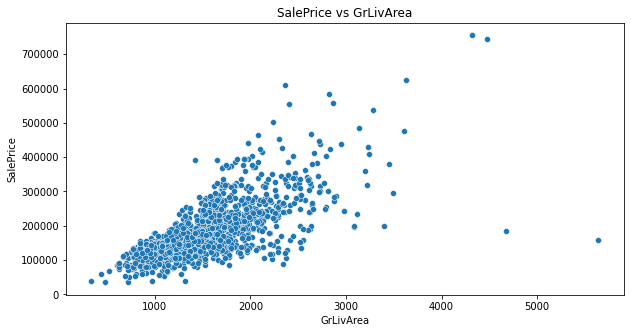

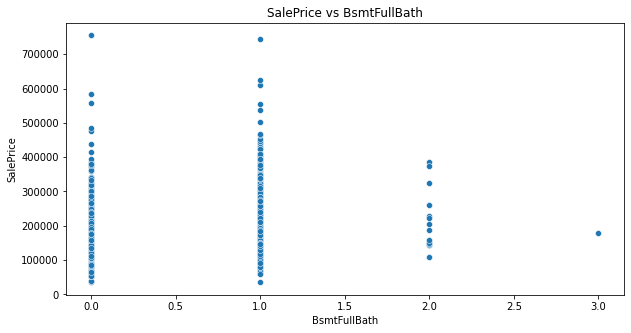

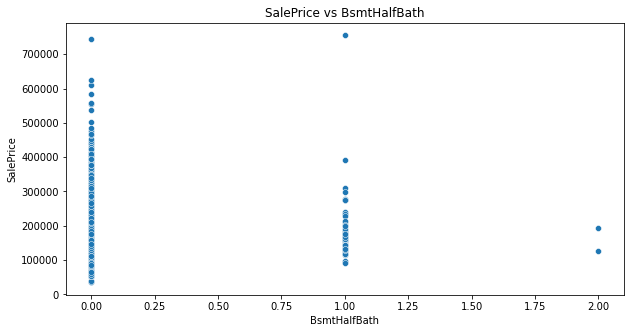

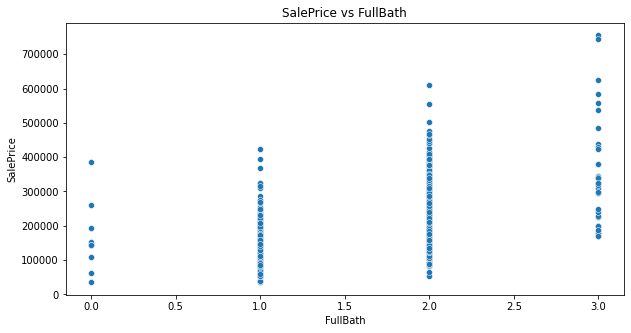

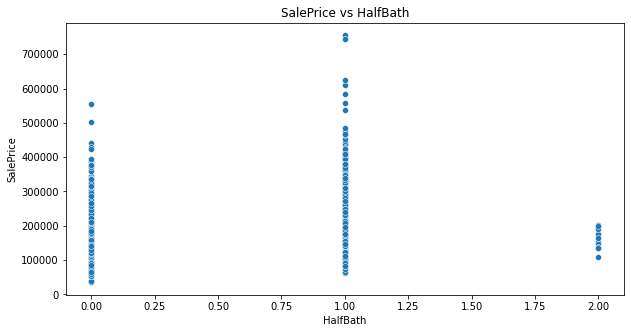

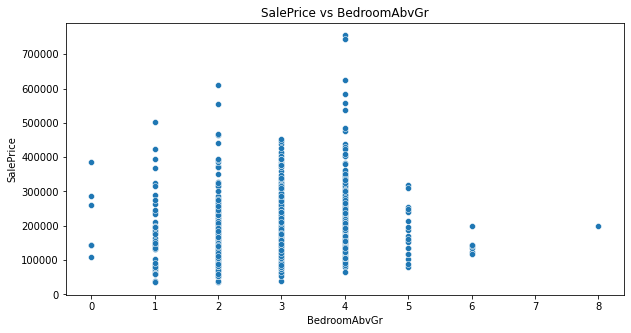

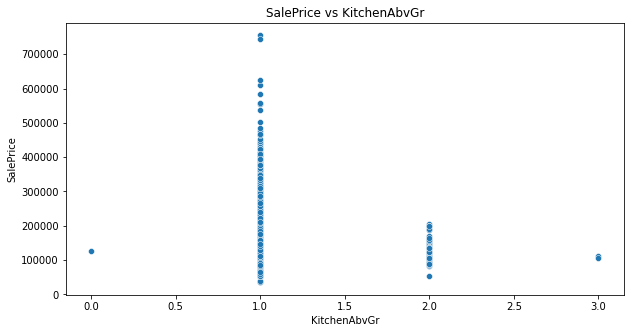

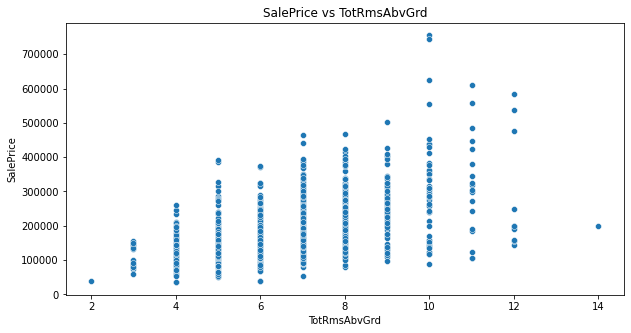

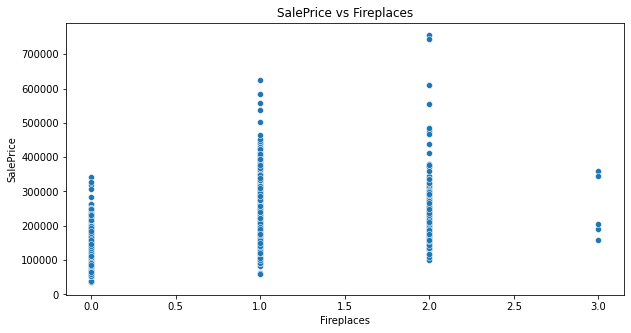

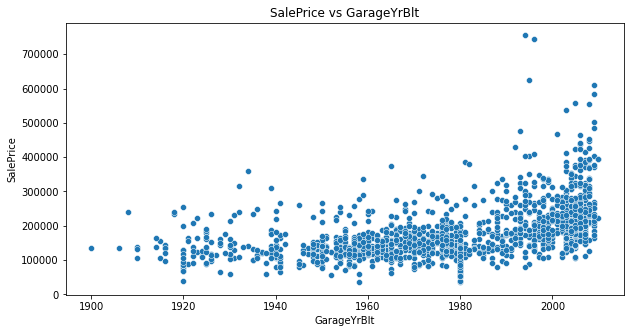

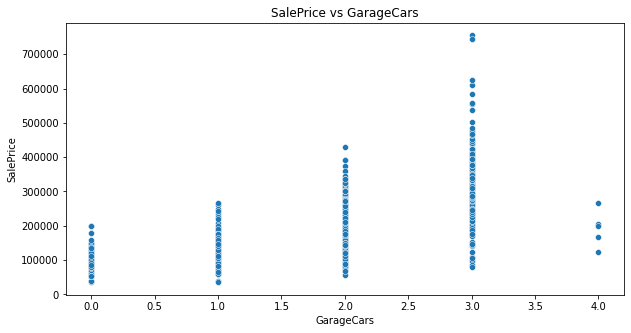

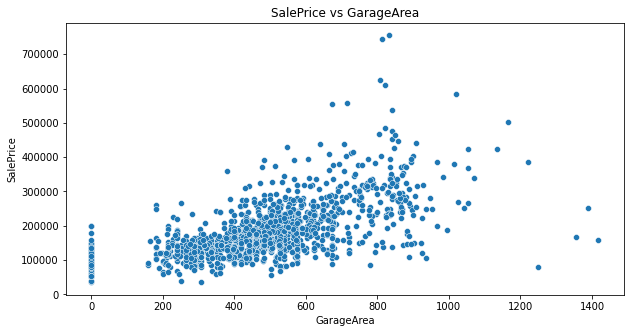

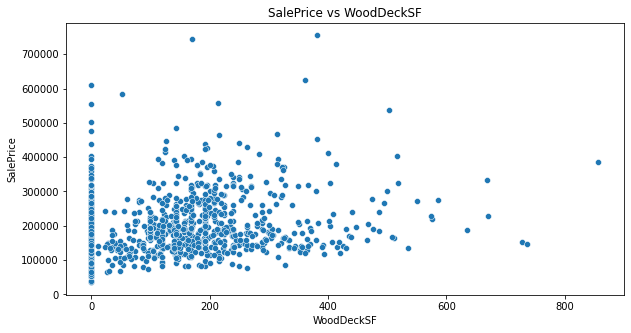

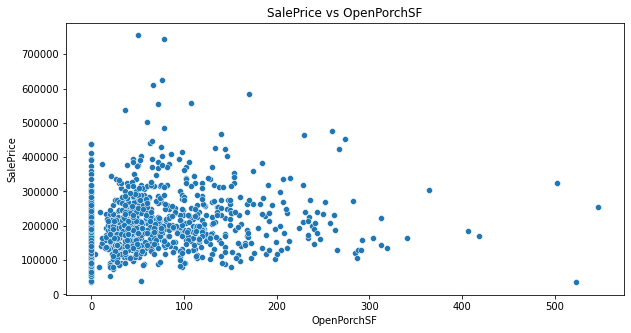

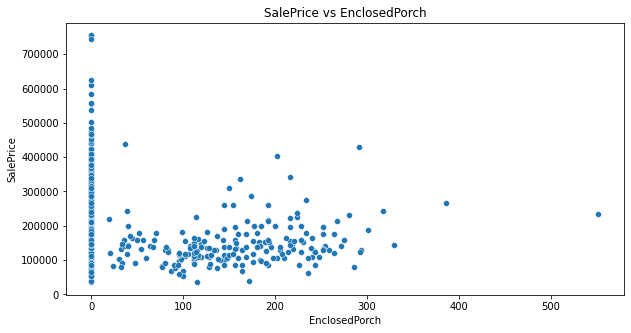

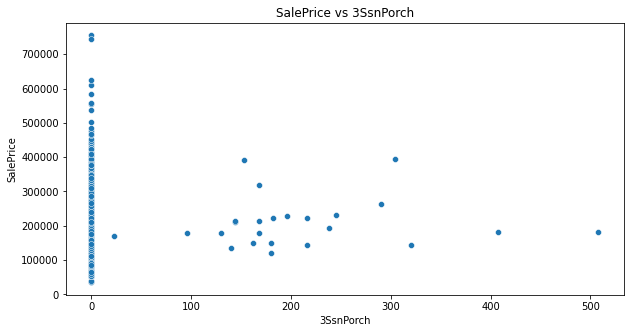

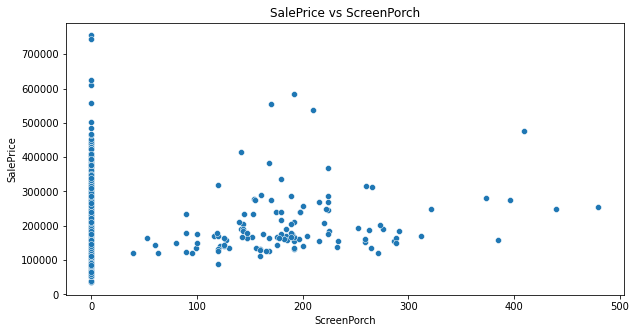

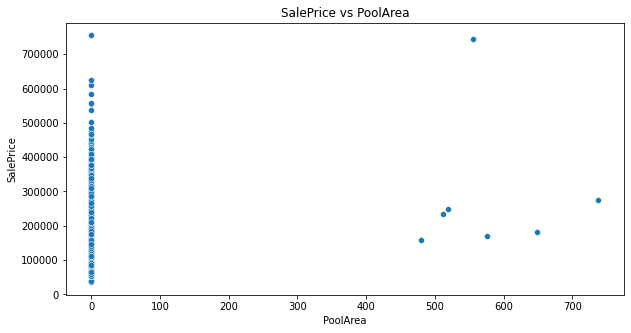

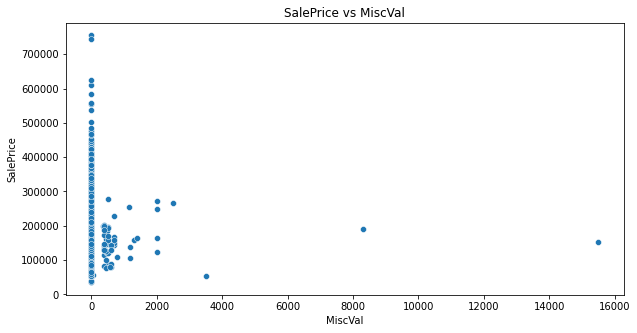

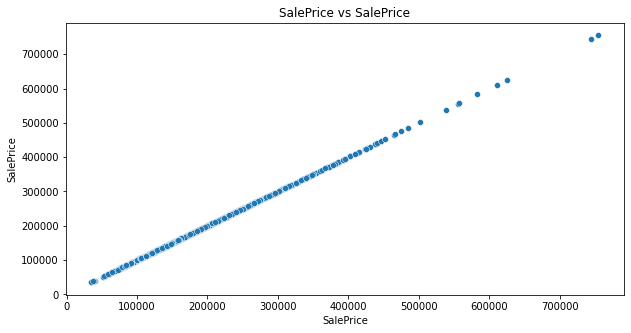

In [15]:
# Scatter plots for continuous variables
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[col], y=data['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.savefig(f"Visualisations/{col}_scatterplot.png", format="png", dpi=300)
    plt.show()

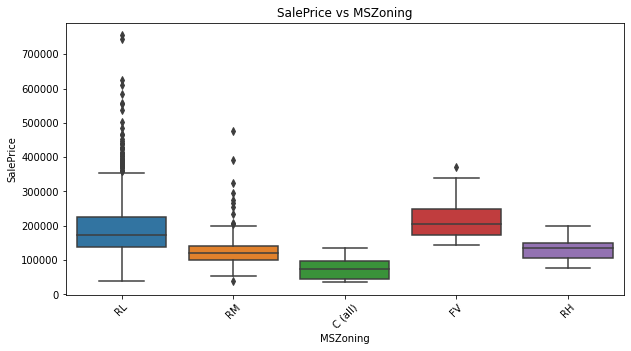

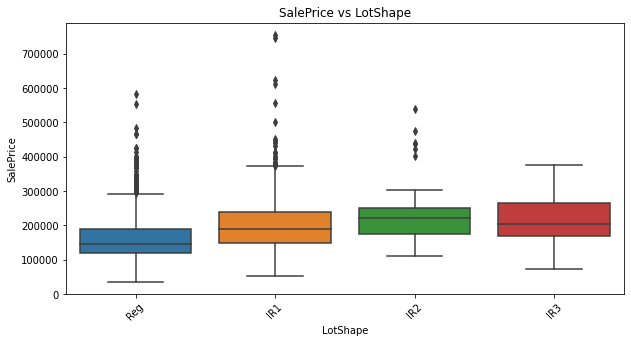

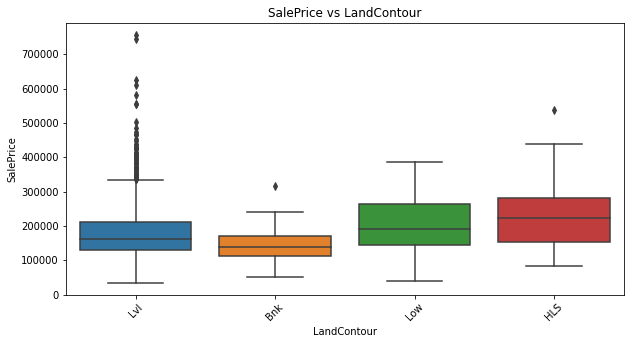

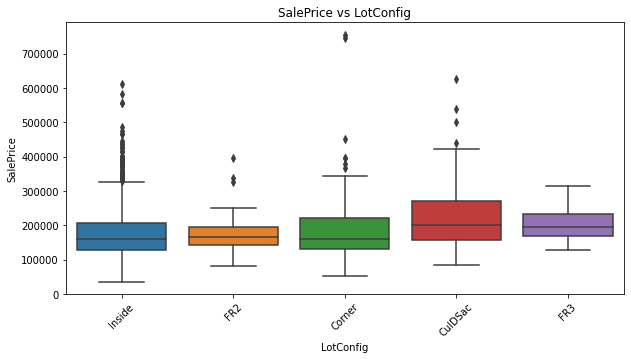

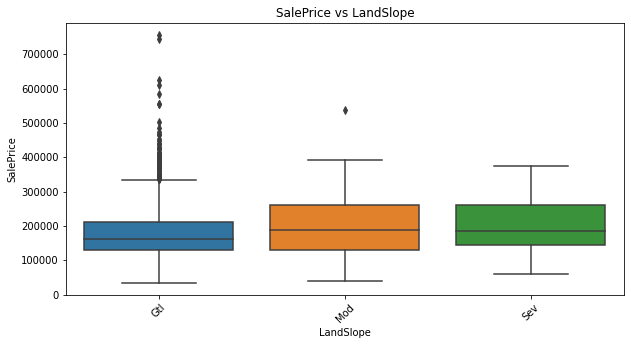

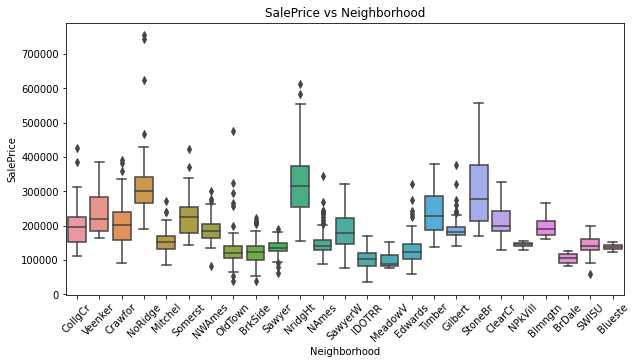

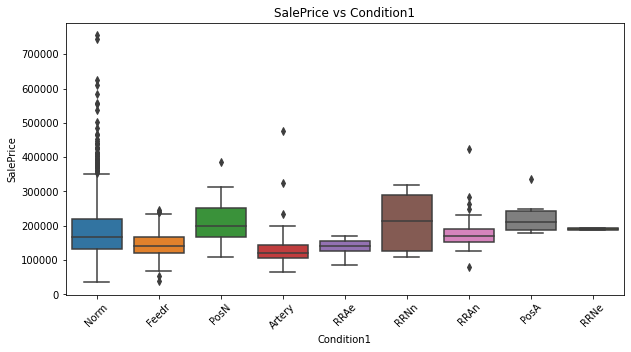

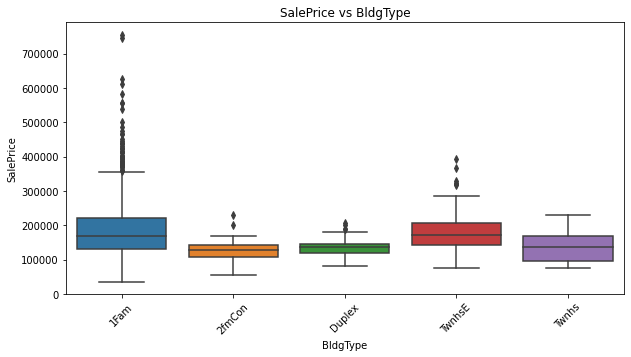

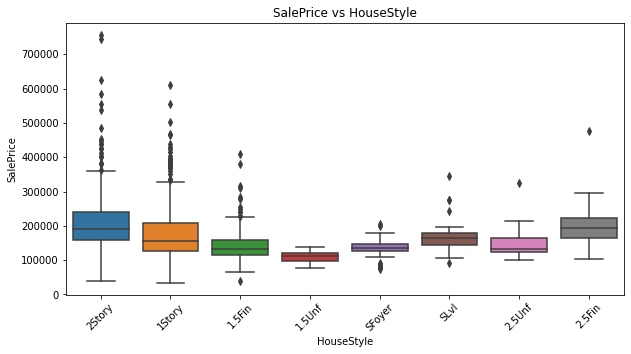

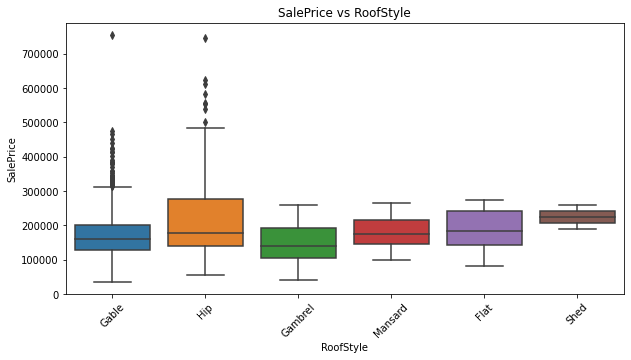

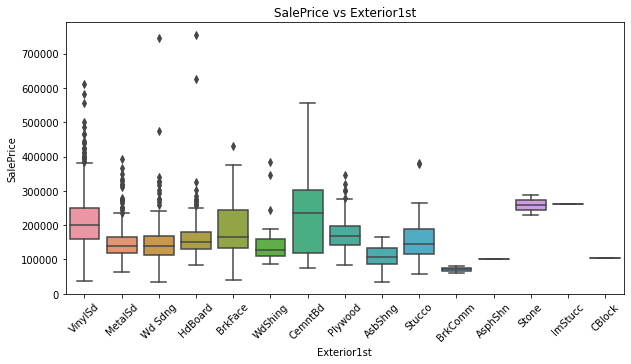

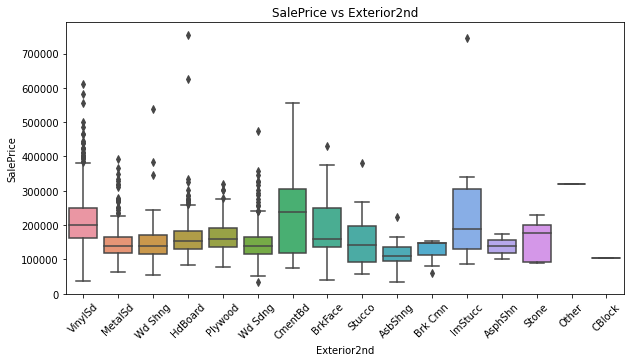

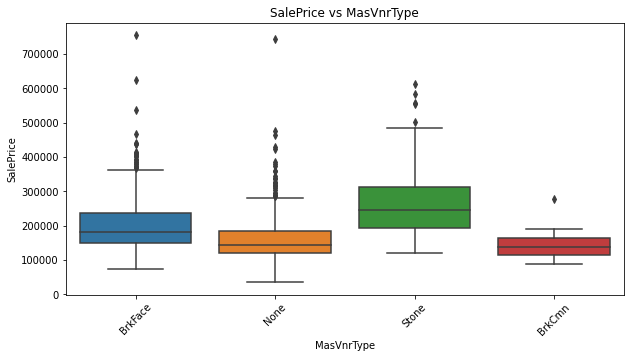

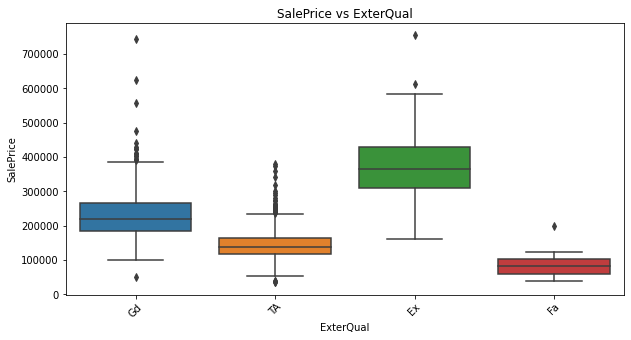

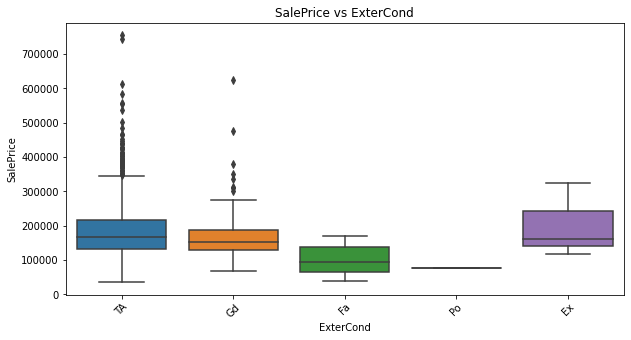

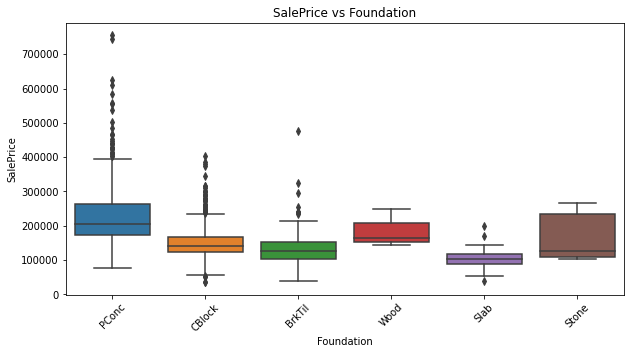

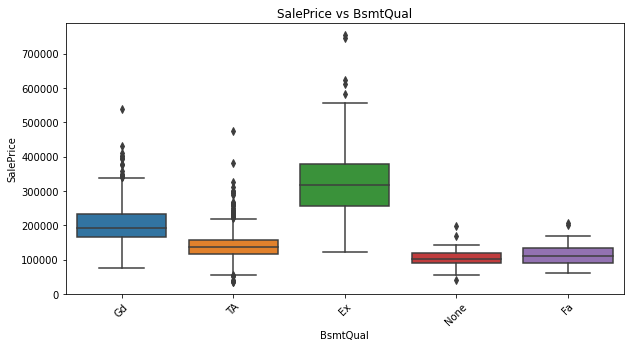

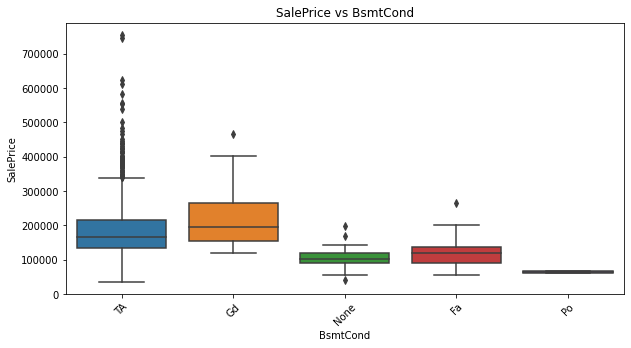

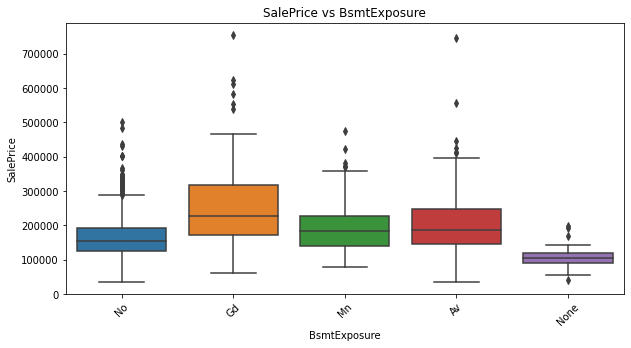

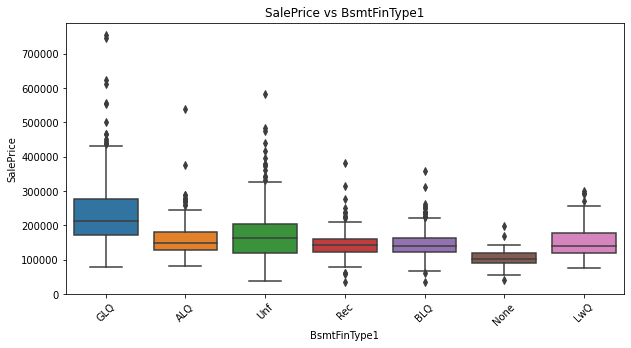

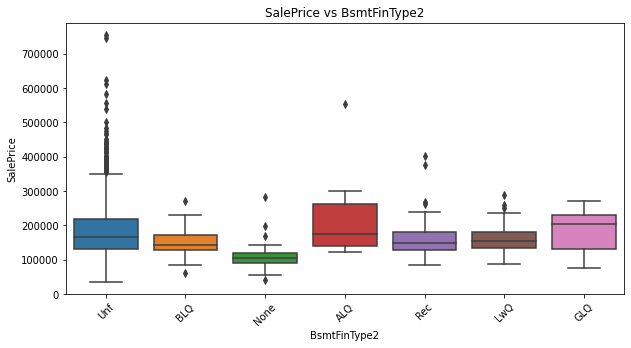

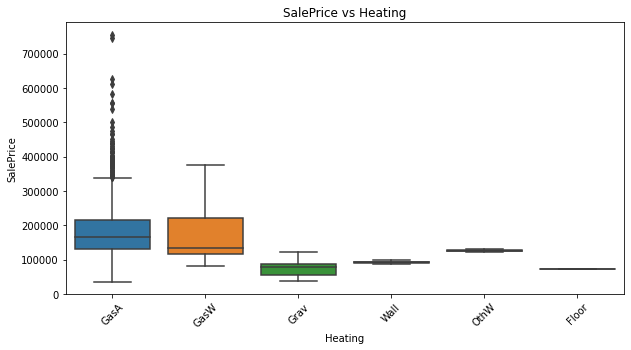

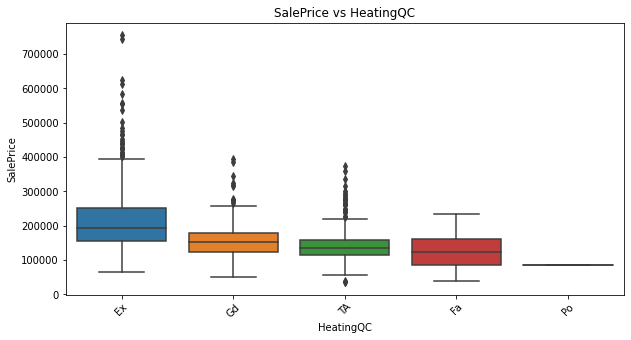

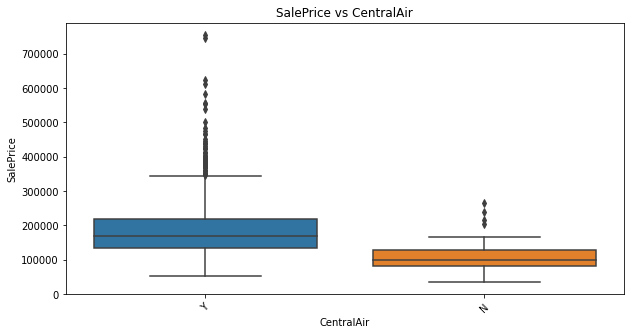

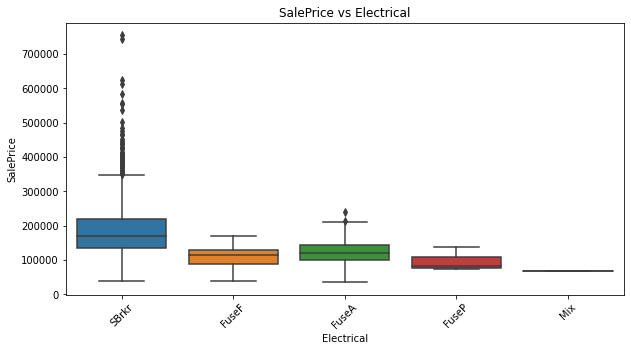

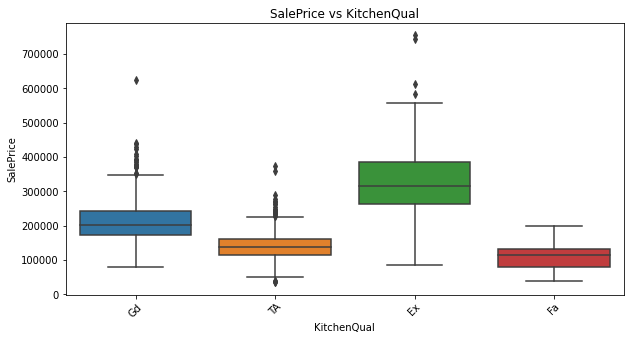

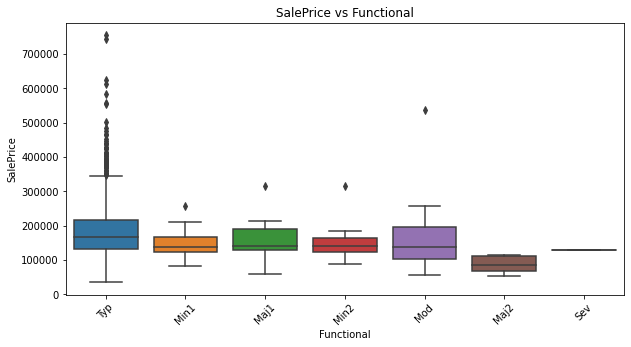

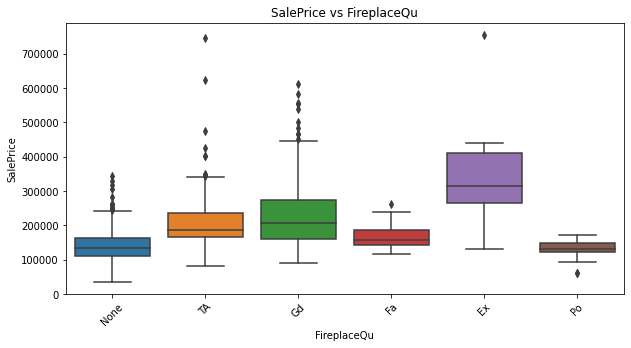

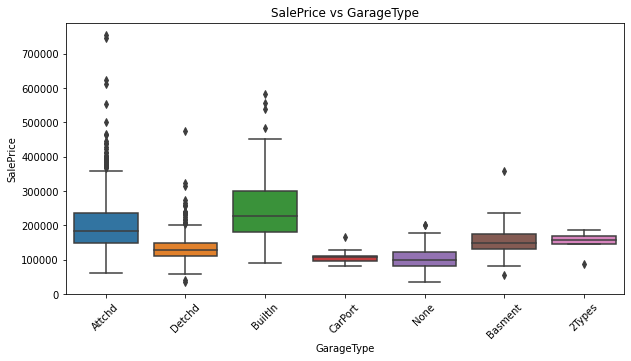

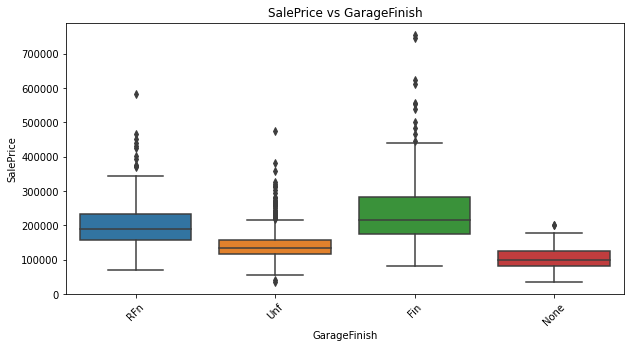

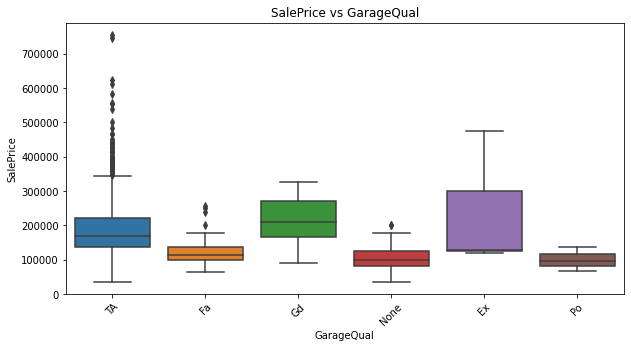

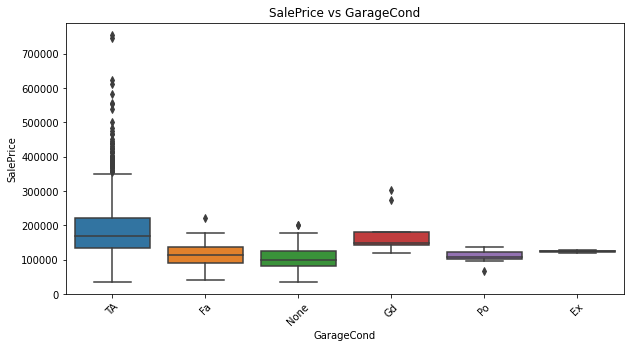

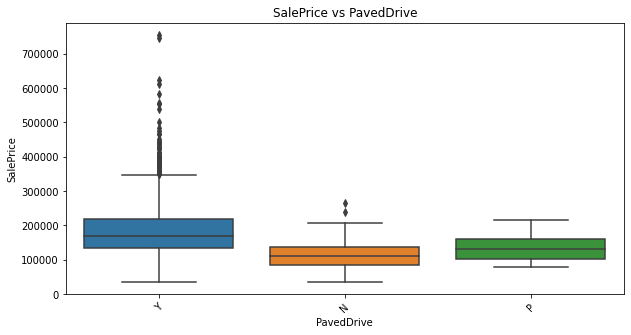

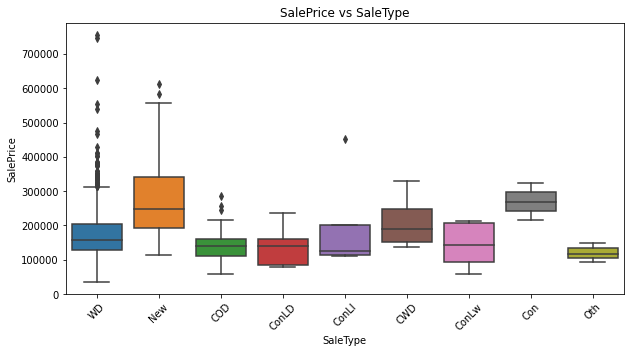

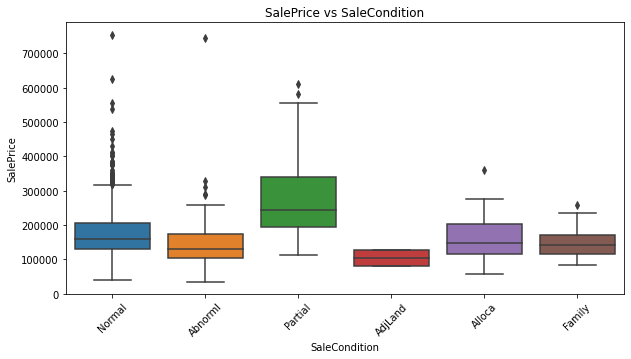

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col], y='SalePrice', data=data)
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.show()

**DATA PREPROCESSING**

In [18]:
# Separate features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines
# Pipeline for numerical data: filling missing values and scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical data: encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Final preprocessing pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform training data
X_train_preprocessed = model_pipeline.fit_transform(X_train)
X_test_preprocessed = model_pipeline.transform(X_test)

print("Preprocessing complete. Training and test sets are ready for modeling.")


Preprocessing complete. Training and test sets are ready for modeling.


**BASELINE LINEAR REGRESSION MODEL**

In [20]:

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test_preprocessed)
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression - R^2:", r2_score(y_test, y_pred_lr))


Linear Regression - RMSE: 32376.751449678675
Linear Regression - R^2: 0.8633364467013083


**DECISION TREE REGRESSOR**

In [21]:


# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test_preprocessed)
print("Decision Tree - RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("Decision Tree - R^2:", r2_score(y_test, y_pred_dt))


Decision Tree - RMSE: 43119.39748456032
Decision Tree - R^2: 0.7576006040408878


**RANDOM FOREST REGRESSOR**

In [22]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test_preprocessed)
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest - R^2:", r2_score(y_test, y_pred_rf))


Random Forest - RMSE: 29008.64189932784
Random Forest - R^2: 0.8902913276289411


**GRADIENT BOOSTING REGRESSOR**

In [23]:
# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test_preprocessed)
print("Gradient Boosting - RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting - R^2:", r2_score(y_test, y_pred_gb))


Gradient Boosting - RMSE: 27776.632451247733
Gradient Boosting - R^2: 0.8994121906303318


**XGBOOST REGRESSOR**

In [24]:
# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost - R^2:", r2_score(y_test, y_pred_xgb))


XGBoost - RMSE: 29521.754460431377
XGBoost - R^2: 0.8863758902971598


**LASSO REGRESSION**

In [25]:
# Initialize and train the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_lasso = lasso_model.predict(X_test_preprocessed)
print("Lasso - RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Lasso - R^2:", r2_score(y_test, y_pred_lasso))


Lasso - RMSE: 32366.826740086155
Lasso - R^2: 0.8634202190460766


c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50294907263.70776, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


**RIDGE REGRESSION**

In [26]:
# Initialize and train the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_ridge = ridge_model.predict(X_test_preprocessed)
print("Ridge - RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Ridge - R^2:", r2_score(y_test, y_pred_ridge))


Ridge - RMSE: 31669.843204455825
Ridge - R^2: 0.8692390725631692
